*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

In [176]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

In [177]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


are there any null values?

In [147]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

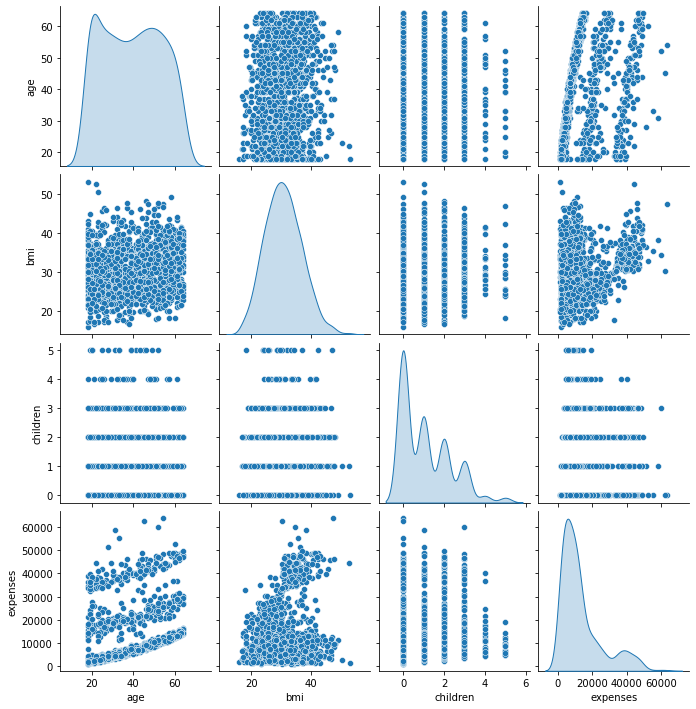

In [178]:
import seaborn as sns

sns.pairplot(dataset, diag_kind='kde')

In [179]:
##Make sure to convert categorical data to numbers.
print(dataset.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object


In [180]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [181]:
print(" train_data num of unique")
print(dataset.apply(lambda x: len(x.unique())))

 train_data num of unique
age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


### Label encoder approach

In [182]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(dataset['sex'])
 
# printing label
label

# removing the column 'sex' from df
# as it is of no use now.
dataset.drop("sex", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'sex'
dataset["sex"] = label
 
# printing Dataframe
dataset

#1 is male
#0 is female

,age,bmi,children,smoker,region,expenses,sex
0,19,27.9,0,yes,southwest,16884.92,0
1,18,33.8,1,no,southeast,1725.55,1
2,28,33.0,3,no,southeast,4449.46,1
3,33,22.7,0,no,northwest,21984.47,1
4,32,28.9,0,no,northwest,3866.86,1
...,...,...,...,...,...,...,...
1333,50,31.0,3,no,northwest,10600.55,1
1334,18,31.9,0,no,northeast,2205.98,0
1335,18,36.9,0,no,southeast,1629.83,0
1336,21,25.8,0,no,southwest,2007.95,0


In [183]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(dataset['smoker'])
 
# printing label
label

# removing the column 'smoker' from df
# as it is of no use now.
dataset.drop("smoker", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'smoker'
dataset["smoker"] = label
 
# printing Dataframe
dataset

#1 is yes
#0 is no

,age,bmi,children,region,expenses,sex,smoker
0,19,27.9,0,southwest,16884.92,0,1
1,18,33.8,1,southeast,1725.55,1,0
2,28,33.0,3,southeast,4449.46,1,0
3,33,22.7,0,northwest,21984.47,1,0
4,32,28.9,0,northwest,3866.86,1,0
...,...,...,...,...,...,...,...
1333,50,31.0,3,northwest,10600.55,1,0
1334,18,31.9,0,northeast,2205.98,0,0
1335,18,36.9,0,southeast,1629.83,0,0
1336,21,25.8,0,southwest,2007.95,0,0


### Dummy variable approach

In [184]:
# using .get_dummies function to convert
# the categorical datatype to numerical
# and storing the returned dataFrame
# in a new variable df1
df1 = pd.get_dummies(dataset['region'])
 
# using pd.concat to concatenate the dataframes
# dataset and df1 and storing the concatenated
# dataFrame in dataset.
dataset = pd.concat([dataset, df1], axis=1).reindex(dataset.index)
 
# removing the column 'region' from dataset
# as it is of no use now.
dataset.drop('region', axis=1, inplace=True)
 
# printing df
dataset

,age,bmi,children,expenses,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,0,1
1,18,33.8,1,1725.55,1,0,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,0,1,0
3,33,22.7,0,21984.47,1,0,0,1,0,0
4,32,28.9,0,3866.86,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,0,1,0,0
1334,18,31.9,0,2205.98,0,0,1,0,0,0
1335,18,36.9,0,1629.83,0,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,0,1


In [185]:
dataset.tail()

,age,bmi,children,expenses,sex,smoker,northeast,northwest,southeast,southwest
1333,50,31.0,3,10600.55,1,0,0,1,0,0
1334,18,31.9,0,2205.98,0,0,1,0,0,0
1335,18,36.9,0,1629.83,0,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,0,1
1337,61,29.1,0,29141.36,0,1,0,1,0,0


In [186]:
print(dataset.dtypes)

age            int64
bmi          float64
children       int64
expenses     float64
sex            int64
smoker         int64
northeast      uint8
northwest      uint8
southeast      uint8
southwest      uint8
dtype: object


In [ ]:
with tf.Session() as sess: # creates a session using the default graph
    tensor.eval() # a tensor will of course be the name of your tensor

In [187]:
#Use 80% of the data as the train_dataset and 20% of the data as the test_dataset
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=0)

In [188]:
#pop off the "expenses" column from these datasets to create new datasets called train_labels and test_labels. Use these labels when training your model.
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [189]:
train_labels = np.asarray(train_labels).astype(np.float32)
test_labels = np.asarray(test_labels).astype(np.float32)

In [190]:
train_dataset.shape

(1070, 9)

In [191]:
test_dataset.shape

(268, 9)

In [192]:
train_labels.shape

(1070,)

In [193]:
test_labels.shape

(268,)

### Creating the model

In [194]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.Input(shape=(len(train_dataset.keys()),)),
  layers.BatchNormalization(),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 64)                640       
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741
Trainable params: 723
Non-trainable params: 18
_________________________________________________________________


In [195]:
model.compile(
    optimizer=tf.optimizers.RMSprop(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['mae', 'mse']
)

In [196]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=40,
    verbose=0,
    validation_split=0.2    # Calculate validation results on 20% of the training data
)

9/9 - 0s - loss: 2216.1597 - mae: 2216.1597 - mse: 20575646.0000 - 33ms/epoch - 4ms/step
Testing set Mean Abs Error: 2216.16 expenses
You passed the challenge. Great job!


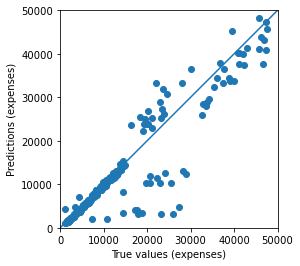

In [197]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)


# Trying without Tensorflow

In [200]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [219]:
# Fit linear regression
model = LinearRegression()
model = sm.OLS(train_labels, train_dataset).fit()

In [220]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          1.81e-301
Time:                        21:58:29   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          253.6724     13.530     18.749      0.0

In [218]:
from sklearn import metrics
predictions = model.predict(test_dataset)
predictions.shape
metrics.mean_absolute_error(test_labels, predictions)

3933.306241832189

In [233]:
# Fit linear regression
model = LinearRegression()
train_dataset_no_region = train_dataset[['age', 'bmi', 'children', 'sex', 'smoker' ]]
test_dataset_no_region = test_dataset[['age', 'bmi', 'children', 'sex', 'smoker' ]]

In [234]:
model_no_region = LinearRegression()
model_no_region = sm.OLS(train_labels, train_dataset_no_region).fit()
print(model_no_region.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              1390.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):                        0.00
Time:                        22:10:42   Log-Likelihood:                         -10912.
No. Observations:                1070   AIC:                                  2.183e+04
Df Residuals:                    1065   BIC:                                  2.186e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [236]:
predictions = model_no_region.predict(test_dataset_no_region)
predictions.shape
metrics.mean_absolute_error(test_labels, predictions)

4261.404982534155

# Failed approaches

In [102]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


### Encoding all at once approach (did not use)

In [142]:
CATEGORICAL_COLUMNS = ['sex', 'smoker']
NUMERIC_COLUMNS = ['age', 'bmi', 'children']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dataset[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

### Input Function

In [131]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function(): # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000) # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat proess for number of epochs
    return ds # return a batch of the dataset
  return input_function # return a function object for use

train_input_fn = make_input_fn(train_dataset, train_labels) # here we will call the input_function that was returned to us to get a dataset object to feed our model
eval_input_fn = make_input_fn(test_dataset, test_labels, num_epochs=1, shuffle=False)

In [143]:
model = tf.estimator.LinearRegressor(feature_columns = feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/_n/rrgq9bp931j_96jz07qrpmfw0000gn/T/tmpagsz_l4h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [144]:
linear_est.train(train_input_fn) # train

INFO:tensorflow:Calling model_fn.


/opt/anaconda3/lib/python3.8/site-packages/tensorflow_estimator/python/estimator/canned/linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_n/rrgq9bp931j_96jz07qrpmfw0000gn/T/tmpxrp2v773/model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/_n/rrgq9bp931j_96jz07qrpmfw0000gn/T/tmpxrp2v773/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


InvalidArgumentError: assertion failed: [Labels must be <= n_classes - 1] [Condition x <= y did not hold element-wise:] [x (head/losses/Cast:0) = ] [[17361.7695][5385.34][9957.72]...] [y (head/losses/check_label_range/Const:0) = ] [1]
	 [[{{node Assert}}]]